In [77]:
# coding: utf-8

In [78]:
import pandas as pd
import MySQLdb
from pandas import Series, DataFrame

In [79]:
# Etablir une connexion avec la base MySQL (chargement des base de la BD)
mysql_cn = MySQLdb.connect(host='localhost', 
                port=3306,user='root', passwd='milaha', 
                db='bicho_maven')

In [80]:
# Charger les tables qui nous interessent
changes = pd.read_sql('select * from changes', con=mysql_cn)
comments = pd.read_sql('select * from comments', con=mysql_cn)
issues = pd.read_sql('select * from issues', con=mysql_cn)
issues_ext_jira = pd.read_sql('select * from issues_ext_jira', con=mysql_cn)
people = pd.read_sql('select * from people', con=mysql_cn)
attachments = pd.read_sql('select * from attachments', con=mysql_cn)
issues_watchers= pd.read_sql('select * from issues_watchers', con=mysql_cn)
trackers = pd.read_sql('select * from trackers', con=mysql_cn)
related_to = pd.read_sql('select * from related_to', con=mysql_cn)
supported_trackers = pd.read_sql('select * from supported_trackers', con=mysql_cn)

In [81]:
# les beugs sont représentés dans cette table
issues

id  tracker_id     issue         type  \
0      1           1  12797095  Improvement   
1      2           1  12793805          Bug   
2      3           1  12793703          Bug   
3      4           1  12793249  Improvement   
4      5           1  12794084  Improvement   
5      6           1  12793868          Bug   
6      7           1  12793793          Bug   
7      8           1  12793822          Bug   
8      9           1  12793592          Bug   
9     10           1  12793525          Bug   
10    11           1  12793522          Bug   
11    12           1  12793693          Bug   
12    13           1  12793038          Bug   
13    14           1  12793364  Improvement   
14    15           1  12793125  Improvement   
15    16           1  12793626          Bug   
16    17           1  12796962          Bug   
17    18           1  12793159  Improvement   
18    19           1  12794106          Bug   
19    20           1  12793123  Improvement   
20    21           1  12793141  Improvement   
21    22           1  12793163  Improvement   
22    23           1  12793825  Improvement   
23    24           1  12793802  Improvement   
24    25           1  12793661         Task   
25    26           1  12793882          Bug   
26    27           1  12793719          Bug   
27    28           1  12793383     Sub-task   
28    29           1  12793982         Task   
29    30           1  12793837          Bug   
..   ...         ...       ...          ...   
570  571           1  12793701          Bug   
571  572           1  12793710          Bug   
572  573           1  12795572          Bug   
573  574           1  12793729          Bug   
574  575           1  12793458          Bug   
575  576           1  12793422          Bug   
576  577           1  12793251          Bug   
577  578           1  12797126  Improvement   
578  579           1  12793757          Bug   
579  580           1  12793771         Task   
580  581           1  12793791          Bug   
581  582           1  12795603          Bug   
582  583           1  12795140  Improvement   
583  584           1  12795642          Bug   
584  585           1  12795482          Bug   
585  586           1  12794311  Improvement   
586  587           1  12793782  Improvement   
587  588           1  12793750         Task   
588  589           1  12793746          Bug   
589  590           1  12793752  Improvement   
590  591           1  12793797          Bug   
591  592           1  12795519  Improvement   
592  593           1  12793760  Improvement   
593  594           1  12793652          Bug   
594  595           1  12793735  Improvement   
595  596           1  12795753  Improvement   
596  597           1  12793861  New Feature   
597  598           1  12793755          Bug   
598  599           1  12793754  Improvement   
599  600           1  12793473          Bug   

                                               summary  \
0    ability to get a list of direct dependencies d...   
1    maven2 archetype plugin's maven-archetype-mojo...   
2    setting of @execute phase="plugin:goal" does n...   
3    Add <include>**/*TestCase.java</include> and <...   
4    setup lax parsing of repository poms and metadata   
5          A link on the maven history page was broken   
6    local snapshot never used when one exists remo...   
7    complete active project discovery for other ar...   
8    maven-model docs incorrectly show <resource> w...   
9    wrong wagon used for a mirror that has a diffe...   
10             IDE plugins get wrong path to snapshots   
11   Deploying source jar to repository receives wr...   
12   Many duplicate entries in ~/.m2/plugin-registr...   
13           model should parse "organisation" as well   
14             reactor run should have its own summary   
15   incorrectly validating 1..1 multiplicity assoc...   
16   When expression="..." is missing in @parameter...   
17   don't default the lifecycle on unknown pac

In [65]:
#Affichage de la table
changes

id  issue_id               field              old_value  \
0        1         1          Resolution                          
1        2         1       Fix Version/s             2.0-beta-1   
2        3         1              Status                   Open   
3        4         1            Assignee                          
4        5         1            Workflow                  Maven   
5        6         1      Project Import                          
6        7         1            Workflow                   jira   
7        8         1      Project Import                          
8        9         1            Workflow                   jira   
9       10         2            Assignee                          
10      11         2              Status                   Open   
11      12         2          Resolution                          
12      13         2            Workflow                  Maven   
13      14         2      Project Import                          
14      15         2            Workflow                   jira   
15      16         2      Project Import                          
16      17         2            Workflow                   jira   
17      18         3          Resolution                          
18      19         3              Status                   Open   
19      20         3              Status                 Closed   
20      21         3          Resolution          Won&#39;t Fix   
21      22         3       Fix Version/s                          
22      23         3            Assignee                          
23      24         3   Original Estimate                          
24      25         3  Remaining Estimate                          
25      26         3       Fix Version/s             2.0-beta-2   
26      27         3       Fix Version/s                          
27      28         3              Status               Reopened   
28      29         3  Remaining Estimate                   0.5h   
29      30         3          Time Spent                          
...    ...       ...                 ...                    ...   
7168  7169       599       Fix Version/s                          
7169  7170       599         Component/s                          
7170  7171       599  Remaining Estimate                          
7171  7172       599       Fix Version/s                    2.0   
7172  7173       599         Component/s                          
7173  7174       599         Component/s  maven-surefire-plugin   
7174  7175       599              Status            In Progress   
7175  7176       599          Resolution                          
7176  7177       599            Workflow                  Maven   
7177  7178       599      Project Import                          
7178  7179       599            Workflow                   jira   
7179  7180       599      Project Import                          
7180  7181       599            Workflow                   jira   
7181  7182       600            Assignee                          
7182  7183       600  Remaining Estimate                          
7183  7184       600          Complexity           Intermediate   
7184  7185       600   Original Estimate                          
7185  7186       600         Component/s                          
7186  7187       600              Status                   Open   
7187  7188       600              Status            In Progress   
7188  7189       600            Assignee                jdcasey   
7189  7190       600   Original Estimate                     2h   
7190  7191       600  Remaining Estimate                     2h   
7191  7192       600              Status                   Open   
7192  7193       600          Resolution                          
7193  7194       600            Workflow                  Maven   
7194  7195       600      Project Import                          
7195  7196       600            Workflow               

In [33]:
#Affichage de table
people

id                  name email                    user_id
0      1              Dan Tran                          dantran
1      2          Brett Porter                      brettporter
2      3                  None  None                    vmassol
3      4                  None  None                      markt
4      5          Brian Bonner                         bkbonner
5      6        Edwin Punzalan                       elpunzalan
6      7                  None                           kenney
7      8                  None  None                    kenneyw
8      9             Jose Luiz                    juzepeleteiro
9     10                  None                            jruiz
10    11        Srdan Srepfler                       schrepfler
11    12                  None                         mihobson
12    13           Bob Allison                         allisonb
13    14            John Casey                          jdcasey
14    15      Michael L. Gantz            gantzm@gantzgulch.com
15    16                  None                                 
16    17            Unassigned                               -1
17    18                  None  None                    jvanzyl
18    19             Alex Wood                        brandolon
19    20                  None                         lacostej
20    21      Alexandre Vivien                       neoptoleme
21    22        Joakim Erdfelt                          joakime
22    23          John Fallows                     john.fallows
23    24       Eugene Kuleshov                               eu
24    25          Binil Thomas                            binil
25    26                  None                          ddewolf
26    27                  None                          davesag
27    28          Barry Kaplan                          memelet
28    29                  None                         aramirez
29    30       Natalie Burdick                         nburdick
..   ...                   ...   ...                        ...
128  129       Trent Rosenbaum                trent_j_rosenbaum
129  130        Garrett Conaty                          gconaty
130  131       Mitch McCuiston                       mmccuiston
131  132         Hiram Chirino                          chirino
132  133          Loic Lefevre                     loic.lefevre
133  134        Gilles Scokart                         gscokart
134  135  Malachi de AElfweald                         malachid
135  136                  None                   choongyong.koh
136  137              Hao Chen                          hchen_0
137  138                  None                          djencks
138  139                  None                      jivesociety
139  140       nicolas de loof                          ndeloof
140  141        Moiz Dohadwala                            moizd
141  142         Dennis Geurts                    dennis.geurts
142  143                  None  None                      yledu
143  144       Jochen Wiedmann        jochen.wiedmann@gmail.com
144  145           Julian Wood                            woodj
145  146         Bill Parducci                          billdog
146  147   Andrius Karpavicius                     akarpavicius
147  148                  None                            gcase
148  149           Incze Lajos                            incze
149  150              mchesney                         mchesney
150  151         Sidart Kurias                          skurias
151  152        Dave Brondsema                         brondsem
152  153          bob makowski                           txusul
153  154             Davy Toch                            dtoch
154  155        Chad Berghorst                       cberghorst
155  156                 skaze                            skaze
156  157           Mike Taylor                             bear
157  158            Adam Hardy                         ahardy66

[158 rows x 4 columns]

In [34]:
# Display columns for tables
list=[changes,comments,issues,issues_ext_jira,people,attachments,issues_watchers,trackers,related_to,supported_trackers]
list1=['changes','comments','issues','issues_ext_jira','people','attachments','issues_watchers','trackers','related_to','supported_trackers']
for l in range(len(list)):
    print list1[l]+' : '
    for col in list[l].columns :
        print col+'|',
    print ''


changes : 
id| issue_id| field| old_value| new_value| changed_by| changed_on| 
comments : 
id| issue_id| comment_id| text| submitted_by| submitted_on| 
issues : 
id| tracker_id| issue| type| summary| description| status| resolution| priority| submitted_by| submitted_on| assigned_to| 
issues_ext_jira : 
id| issue_key| link| title| environment| security| updated| version| fix_version| component| votes| project| project_id| project_key| status| resolution| issue_id| 
people : 
id| name| email| user_id| 
attachments : 
id| issue_id| name| description| url| submitted_by| submitted_on| 
issues_watchers : 
id| issue_id| person_id| 
trackers : 
id| url| type| retrieved_on| 
related_to : 
id| issue_id| related_to| type| 
supported_trackers : 
id| name| version| 


In [36]:
# how length tables
print 'loaded dataframe changes records:', len(changes)
print 'loaded dataframe comments records:', len(comments)
print 'loaded dataframe issues records:', len(issues)
print 'loaded dataframe issues_ext_jira records:', len(issues_ext_jira)
print 'loaded dataframe people records:', len(people)
print 'loaded dataframe attachments records:', len(attachments)
print 'loaded dataframe trackers records:', len(trackers)
print 'loaded dataframe people records:', len(people)
print 'loaded dataframe related_to records:', len(related_to)
print 'loaded dataframe supported_trackers records:', len(supported_trackers)

loaded dataframe changes records: 7198
loaded dataframe comments records: 1210
loaded dataframe issues records: 600
loaded dataframe issues_ext_jira records: 600
loaded dataframe people records: 158
loaded dataframe attachments records: 181
loaded dataframe trackers records: 1
loaded dataframe people records: 158
loaded dataframe related_to records: 0
loaded dataframe supported_trackers records: 1


In [104]:
issues_ext_jira

id issue_key                                            link  \
0      1   MNG-726   https://issues.apache.org/jira/browse/MNG-726   
1      2  MNG-1201  https://issues.apache.org/jira/browse/MNG-1201   
2      3   MNG-817   https://issues.apache.org/jira/browse/MNG-817   
3      4   MNG-746   https://issues.apache.org/jira/browse/MNG-746   
4      5  MNG-1788  https://issues.apache.org/jira/browse/MNG-1788   
5      6  MNG-1261  https://issues.apache.org/jira/browse/MNG-1261   
6      7  MNG-1036  https://issues.apache.org/jira/browse/MNG-1036   
7      8   MNG-950   https://issues.apache.org/jira/browse/MNG-950   
8      9   MNG-523   https://issues.apache.org/jira/browse/MNG-523   
9     10   MNG-486   https://issues.apache.org/jira/browse/MNG-486   
10    11  MNG-1127  https://issues.apache.org/jira/browse/MNG-1127   
11    12   MNG-745   https://issues.apache.org/jira/browse/MNG-745   
12    13   MNG-800   https://issues.apache.org/jira/browse/MNG-800   
13    14   MNG-707   https://issues.apache.org/jira/browse/MNG-707   
14    15    MNG-94    https://issues.apache.org/jira/browse/MNG-94   
15    16   MNG-638   https://issues.apache.org/jira/browse/MNG-638   
16    17   MNG-640   https://issues.apache.org/jira/browse/MNG-640   
17    18   MNG-652   https://issues.apache.org/jira/browse/MNG-652   
18    19  MNG-1777  https://issues.apache.org/jira/browse/MNG-1777   
19    20    MNG-75    https://issues.apache.org/jira/browse/MNG-75   
20    21   MNG-122   https://issues.apache.org/jira/browse/MNG-122   
21    22   MNG-654   https://issues.apache.org/jira/browse/MNG-654   
22    23   MNG-919   https://issues.apache.org/jira/browse/MNG-919   
23    24  MNG-1182  https://issues.apache.org/jira/browse/MNG-1182   
24    25   MNG-610   https://issues.apache.org/jira/browse/MNG-610   
25    26  MNG-1260  https://issues.apache.org/jira/browse/MNG-1260   
26    27   MNG-794   https://issues.apache.org/jira/browse/MNG-794   
27    28   MNG-329   https://issues.apache.org/jira/browse/MNG-329   
28    29  MNG-1552  https://issues.apache.org/jira/browse/MNG-1552   
29    30  MNG-1073  https://issues.apache.org/jira/browse/MNG-1073   
..   ...       ...                                             ...   
570  571   MNG-755   https://issues.apache.org/jira/browse/MNG-755   
571  572   MNG-840   https://issues.apache.org/jira/browse/MNG-840   
572  573   MNG-893   https://issues.apache.org/jira/browse/MNG-893   
573  574   MNG-985   https://issues.apache.org/jira/browse/MNG-985   
574  575   MNG-677   https://issues.apache.org/jira/browse/MNG-677   
575  576   MNG-680   https://issues.apache.org/jira/browse/MNG-680   
576  577   MNG-757   https://issues.apache.org/jira/browse/MNG-757   
577  578   MNG-575   https://issues.apache.org/jira/browse/MNG-575   
578  579   MNG-966   https://issues.apache.org/jira/browse/MNG-966   
579  580   MNG-846   https://issues.apache.org/jira/browse/MNG-846   
580  581   MNG-931   https://issues.apache.org/jira/browse/MNG-931   
581  582   MNG-908   https://issues.apache.org/jira/browse/MNG-908   
582  583   MNG-760   https://issues.apache.org/jira/browse/MNG-760   
583  584   MNG-936   https://issues.apache.org/jira/browse/MNG-936   
584  585   MNG-869   https://issues.apache.org/jira/browse/MNG-869   
585  586   MNG-517   https://issues.apache.org/jira/browse/MNG-517   
586  587   MNG-906   https://issues.apache.org/jira/browse/MNG-906   
587  588   MNG-899   https://issues.apache.org/jira/browse/MNG-899   
588  589  MNG-1011  https://issues.apache.org/jira/browse/MNG-1011   
589  590  MNG-1098  https://issues.apache.org/jira/browse/MNG-1098   
590  591   MNG-918   https://issues.apache.org/jira/browse/MNG-918   
591  592   MNG-941   https://issues.apache.org/jira/browse/MNG-941   
592  593   MNG-952   https://issues.apache.org/jira/browse/MNG-952   
593  594   MNG-614   https://issues.apache.org/jira/browse/MNG-614   
594  595   MNG-764   https://issues.apache.org/jira/browse/MNG-764   
595  596  MNG-12

In [107]:
trackers

id                                        url  type        retrieved_on
0   1  https://issues.apache.org/jira/browse/MNG     1 2017-01-24 19:52:22

In [82]:
# COMPUTE THE NUMBER OF RESOLUTION FOR EACH TYPE RESOLUTION
iss = issues[['resolution']].groupby(issues.resolution)['resolution'].count()

#Afficher le résultat
iss

resolution
Cannot Reproduce     15
Duplicate            48
Fixed               489
Incomplete            1
Won't Fix            47
Name: resolution, dtype: int64

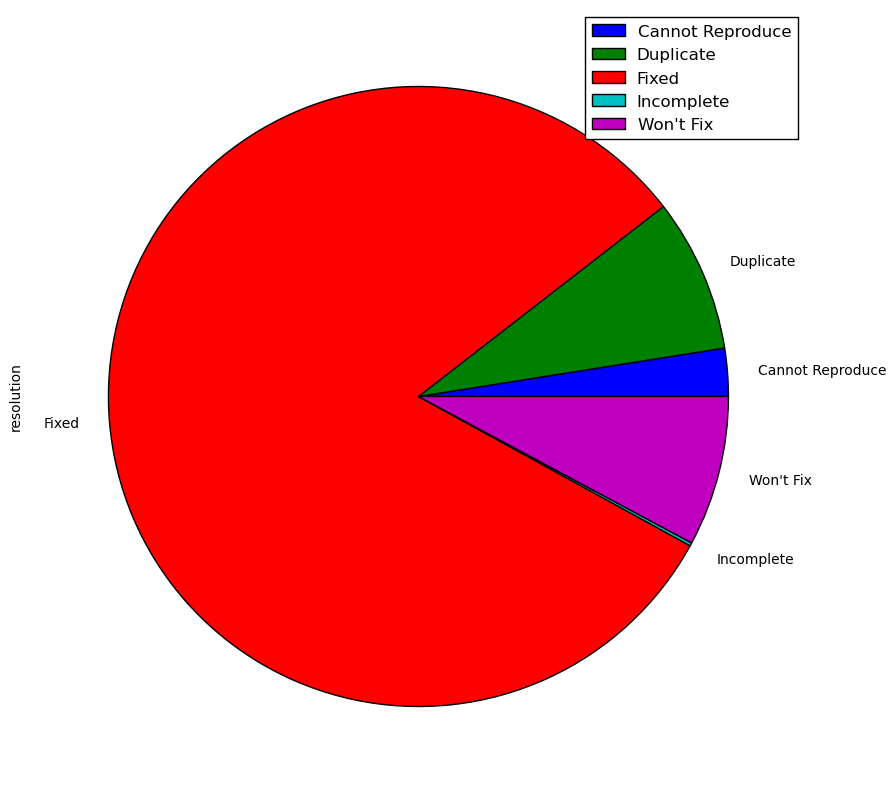

In [83]:
# DISPLAY RESULTS
get_ipython().magic(u'matplotlib inline')
iss.plot(kind='pie',figsize=(10,10),legend=True,subplots=False)

In [84]:
# DISPLAY TYPE OF ISSUES
t=issues[['type']].groupby(issues.type)['type'].count()

In [66]:
t

type
Bug            329
Improvement    159
New Feature     34
Sub-task        14
Task            56
Wish             8
Name: type, dtype: int64

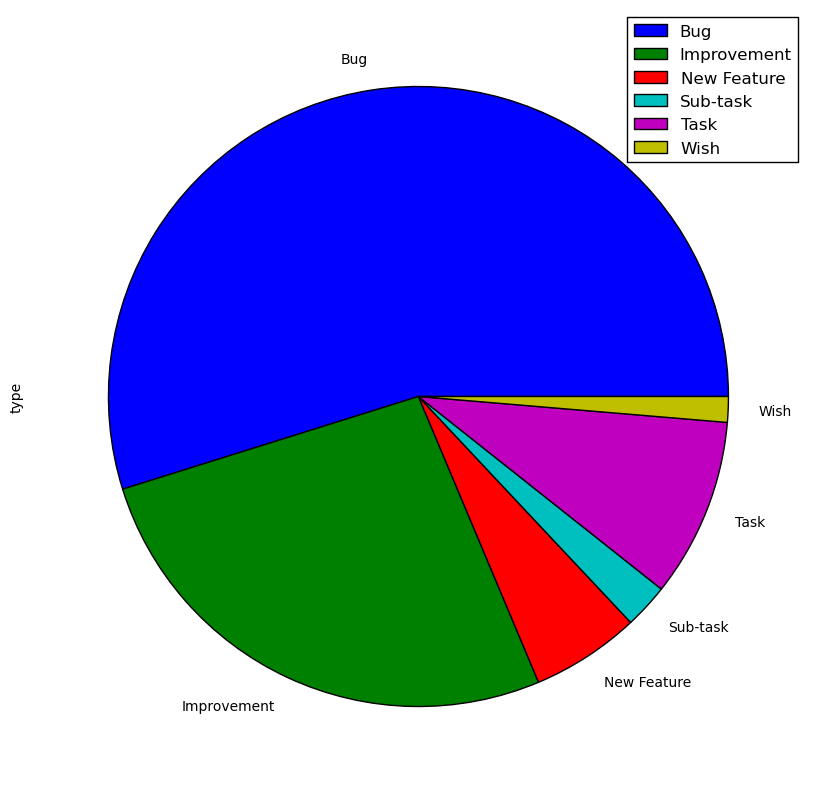

In [42]:
get_ipython().magic(u'matplotlib inline')
t.plot(kind='pie',figsize=(10,10),legend=True,subplots=False)

In [85]:
# GET THE DIFFRENT STATUS OF ISSUES (open or close)
s=issues[['status']].groupby(issues.status)['status'].count()

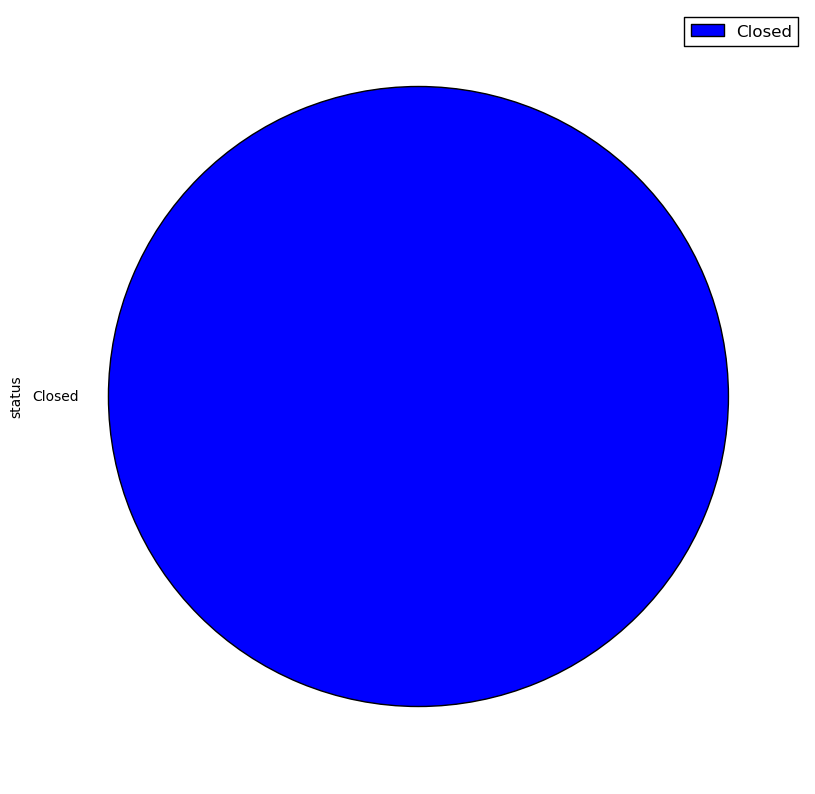

In [86]:
get_ipython().magic(u'matplotlib inline')
s.plot(kind='pie',figsize=(10,10),legend=True,subplots=False)

In [87]:
# DISPLAY THE BUGS THAT ARE  NOT RESOLVED 
issues[issues['resolution']=='']

Empty DataFrame
Columns: [id, tracker_id, issue, type, summary, description, status, resolution, priority, submitted_by, submitted_on, assigned_to]
Index: []

In [88]:
# calculer le nombre de beug par trimestre

# on va commenncer par modifier le dataset en mettant la colonne submitted_on comme index de la table issues
# mais on fabrique un nouveau dataframe pour ne pas toucher a issus
# Le temps moyen d'une correction pour un beug
# il faut essayer de trouver la date de résolution peut être dans changes(le dernier change d'un beug)
# on sinteresse uniquement qu'aux beugs fixed et résolved
# introduire la date dans la table changes pour chaque changement(ligne)
# dans la table issues, on fait un merge avec le bug_id et les beugs resolved and closes pour issues, et aussi le submitted on
# La différence entre la date de début de bug et la date de subbmitted on.
# faire la moyenne
# faire la moyenne par trimestre
newdf = issues.set_index(pd.to_datetime(issues.submitted_on))

In [89]:
# Prendre uniquement une colonne en occurence status par exemple juste pour compter le nombre de ligne peut importe a colonne
from datetime import datetime
res = newdf[['status']].groupby(pd.Grouper(freq='Q-DEC')).aggregate(pd.Series.count)

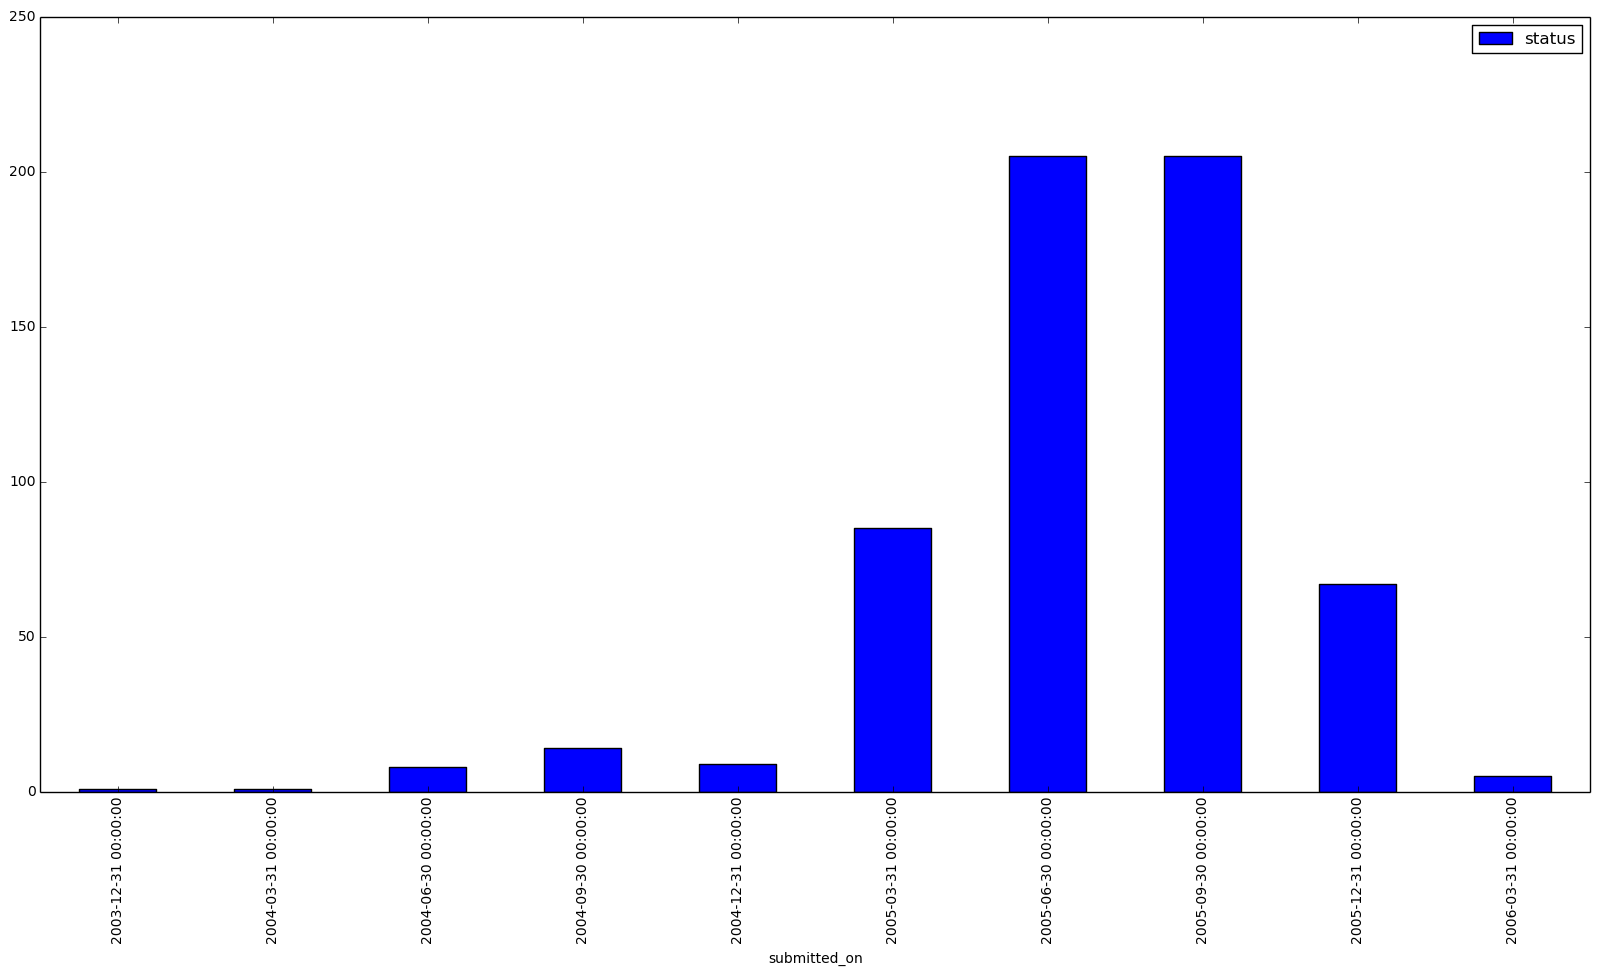

In [90]:
get_ipython().magic(u'matplotlib inline')
res.plot(kind='bar',figsize=(20,10))

In [93]:
# Le temps moyen d'une correction pour un beug
# il faut essayer de trouver la date de résolution peut être dans changes(le dernier change d'un beug)
# on sinteresse uniquement qu'aux beugs fixed et résolved
# introduire la date dans la table changes pour chaque changement(ligne)
# dans la table issues, on fait un merge avec le bug_id et les beugs resolved and closes pour issues, et aussi le submitted on
# La différence entre la date de début de bug et la date de subbmitted on.
# faire la moyenne
# faire la moyenne par trimestre


# In[21]:

# Avec la table changes, on fera un groupement pour chaque issues_id on veux avoir tout les changement qui ont eu lieu
# et pour chaque regrouppement, on prend la dernière valeur c.a.d le dernier changement
grouped = changes.groupby(changes['issue_id']) 
grouped.aggregate(pd.Series.count)


id  field  old_value  new_value  changed_by  \
issue_id                                                
1          9      9          9          9           9   
2          8      8          8          8           8   
3         20     20         20         20          20   
4         11     11         11         11          11   
5          9      9          9          9           9   
6          9      9          9          9           9   
7         14     14         14         14          14   
8         14     14         14         14          14   
9         21     21         21         21          21   
10         9      9          9          9           9   
11        19     19         19         19          19   
12        11     11         11         11          11   
13        17     17         17         17          17   
14        14     14         14         14          14   
15        18     18         18         18          18   
16        14     14         14         14          14   
17        16     16         16         16          16   
18        11     11         11         11          11   
19         8      8          8          8           8   
20        16     16         16         16          16   
21        30     30         30         30          30   
22        10     10         10         10          10   
23         8      8          8          8           8   
24         8      8          8          8           8   
25         8      8          8          8           8   
26         9      9          9          9           9   
27        12     12         12         12          12   
28         9      9          9          9           9   
29         7      7          7          7           7   
30         8      8          8          8           8   
...       ..    ...        ...        ...         ...   
571       17     17         17         17          17   
572       17     17         17         17          17   
573       10     10         10         10          10   
574       19     19         19         19          19   
575       15     15         15         15          15   
576       18     18         18         18          18   
577       24     24         24         24          24   
578       11     11         11         11          11   
579        8      8          8          8           8   
580        9      9          9          9           9   
581        9      9          9          9           9   
582       10     10         10         10          10   
583       20     20         20         20          20   
584       17     17         17         17          17   
585       13     13         13         13          13   
586       17     17         17         17          17   
587       10     10         10         10          10   
588       14     14         14         14          14   
589       22     22         22         22          22   
590       10     10         10         10          10   
591        9      9          9          9           9   
592       16     16         16         16          16   
593       11     11         11         11          11   
594       14     14         14         14          14   
595       14     14         14         14          14   
596       10     10         10         10          10   
597        9      9          9          9           9   
598        9      9          9          9           9   
599       20     20         20         20          20   
600       17     17         17         17          17   

                            changed_on  
issue_id                                
1        1970-01-01 00:00:00.000000009  
2        1970-01-01 00:00:00.000000008  
3        1970-01-01 00:00:00.000000020  
4        1970-01-01 00:00:00.000000011  
5        1970-01-01 00:00:00.000000009  
6        1970-01-01 00:00:00.000000009  
7        1970-01-01 00:00:00.000000014  
8        1970-01-01 00:00:00.000000014  
9       

In [94]:
# récupérer le dernier changement
last_change = grouped.tail(1)[['issue_id','changed_on']]

In [95]:
# Prendre uniquement les information nécessaire pour la construction de notre nouveau dataframe
first_change = issues[['id','type','resolution','submitted_on']]

In [96]:
# regarder uniquement les bugs fixés
fixed = first_change[first_change['resolution'] == 'FIXED']

In [97]:
# merge (join) entre les beug fixed et les beugs changé dernierement
resolu = pd.merge(last_change,fixed,left_on='issue_id',right_on='id',how='right')

In [98]:
# soustration de fata frame
tdelta = pd.DataFrame(resolu[['changed_on']].sub(resolu['submitted_on'], axis=0)['changed_on'])

In [99]:
# affichage
tdelta

Empty DataFrame
Columns: [changed_on]
Index: []

In [100]:
# merger le resultat avec la table précedente pour plus de conpréhension
bug_corr = pd.merge(tdelta,resolu,left_index=True,right_index=True)

In [101]:
bug_corr

Empty DataFrame
Columns: [changed_on_x, issue_id, changed_on_y, id, type, resolution, submitted_on]
Index: []

In [102]:
# faire la moyenne de temps de correction de beugs
# faire une moyenne par trimestre est préférable surtout pour un projet qui date de plus de 10 ans
# faire un group by trimestre
# Q-DEC : Quaterly = (trimestre) , DEC = (commencer par le mois de décembre)
# Recombiner les données ensemble en donnant la moyenne (agregate merger par l'index commun)
bug_corr.set_index('submitted_on').groupby(pd.Grouper(freq='Q-DEC')).aggregate(pd.Series.mean)

Empty DataFrame
Columns: [changed_on_x, issue_id, changed_on_y, id, type, resolution]
Index: []

In [ ]:
###################################################

In [126]:
factor12 = issues_ext_jira[['component','environment']]
factor12

component  \
0        Inheritance and Interpolation   
1                                        
2                           Plugin API   
3                                        
4           Artifacts and Repositories   
5              Documentation:  General   
6           Artifacts and Repositories   
7                Plugins and Lifecycle   
8              Documentation:  General   
9           Artifacts and Repositories   
10          Artifacts and Repositories   
11          Artifacts and Repositories   
12                                       
13                                 POM   
14                                       
15                                 POM   
16               Plugins and Lifecycle   
17               Plugins and Lifecycle   
18                   Bootstrap & Build   
19                                       
20               Plugins and Lifecycle   
21                                       
22               Plugins and Lifecycle   
23                                       
24                                       
25                                       
26          Artifacts and Repositories   
27                                       
28        Documentation: Introductions   
29               Plugins and Lifecycle   
..                                 ...   
570              Plugins and Lifecycle   
571                         Plugin API   
572                                      
573              Plugins and Lifecycle   
574                                      
575      Inheritance and Interpolation   
576                                      
577         Artifacts and Repositories   
578            Documentation:  General   
579                                      
580            Documentation:  General   
581                                      
582                                      
583              Plugins and Lifecycle   
584              Plugins and Lifecycle   
585              Plugins and Lifecycle   
586              Plugins and Lifecycle   
587                                      
588                                      
589              Plugins and Lifecycle   
590            Documentation:  General   
591              Plugins and Lifecycle   
592            Documentation:  General   
593         Artifacts and Repositories   
594              Plugins and Lifecycle   
595  Design, Patterns & Best Practices   
596                                      
597              Plugins and Lifecycle   
598            Documentation:  General   
599              Plugins and Lifecycle   

                                           environment  
0                                                   xp  
1                                                       
2                                                       
3                                                       
4                                                       
5                                                 Site  
6                                                       
7                                                       
8                                                       
9                                                       
10                                                      
11   Working from SVN revision 233074<br/>\nProject...  
12                                          xp, rehdat  
13                                                      
14                                                      
15                                                      
16                                                      
17                                                      
18                                                      
19                                                      
20                                                      
21                                                      
22                                          Linux/Unix  
23                                                      

In [137]:
factor3 = issues[['id','priority']]
factor3

id  priority
0      1     Major
1      2     Major
2      3     Major
3      4     Major
4      5   Blocker
5      6     Major
6      7     Major
7      8     Minor
8      9     Major
9     10     Major
10    11     Major
11    12     Major
12    13     Major
13    14     Minor
14    15     Major
15    16     Major
16    17     Minor
17    18     Major
18    19     Major
19    20     Major
20    21     Minor
21    22     Major
22    23     Major
23    24     Major
24    25     Major
25    26     Major
26    27     Major
27    28  Critical
28    29     Major
29    30     Major
..   ...       ...
570  571  Critical
571  572     Minor
572  573     Major
573  574     Major
574  575     Minor
575  576     Major
576  577   Blocker
577  578     Major
578  579     Minor
579  580     Major
580  581     Major
581  582     Major
582  583     Major
583  584     Minor
584  585     Minor
585  586     Major
586  587     Minor
587  588     Major
588  589     Major
589  590     Minor
590  591   Trivial
591  592     Minor
592  593     Minor
593  594     Major
594  595     Major
595  596     Major
596  597     Minor
597  598     Major
598  599     Minor
599  600     Major

[600 rows x 2 columns]

In [138]:
# MERGE 1
merge1 = pd.merge(factor12,factor3,left_index=True,right_index=True)
merge1

component  \
0        Inheritance and Interpolation   
1                                        
2                           Plugin API   
3                                        
4           Artifacts and Repositories   
5              Documentation:  General   
6           Artifacts and Repositories   
7                Plugins and Lifecycle   
8              Documentation:  General   
9           Artifacts and Repositories   
10          Artifacts and Repositories   
11          Artifacts and Repositories   
12                                       
13                                 POM   
14                                       
15                                 POM   
16               Plugins and Lifecycle   
17               Plugins and Lifecycle   
18                   Bootstrap & Build   
19                                       
20               Plugins and Lifecycle   
21                                       
22               Plugins and Lifecycle   
23                                       
24                                       
25                                       
26          Artifacts and Repositories   
27                                       
28        Documentation: Introductions   
29               Plugins and Lifecycle   
..                                 ...   
570              Plugins and Lifecycle   
571                         Plugin API   
572                                      
573              Plugins and Lifecycle   
574                                      
575      Inheritance and Interpolation   
576                                      
577         Artifacts and Repositories   
578            Documentation:  General   
579                                      
580            Documentation:  General   
581                                      
582                                      
583              Plugins and Lifecycle   
584              Plugins and Lifecycle   
585              Plugins and Lifecycle   
586              Plugins and Lifecycle   
587                                      
588                                      
589              Plugins and Lifecycle   
590            Documentation:  General   
591              Plugins and Lifecycle   
592            Documentation:  General   
593         Artifacts and Repositories   
594              Plugins and Lifecycle   
595  Design, Patterns & Best Practices   
596                                      
597              Plugins and Lifecycle   
598            Documentation:  General   
599              Plugins and Lifecycle   

                                           environment   id  priority  
0                                                   xp    1     Major  
1                                                         2     Major  
2                                                         3     Major  
3                                                         4     Major  
4                                                         5   Blocker  
5                                                 Site    6     Major  
6                                                         7     Major  
7                                                         8     Minor  
8                                                         9     Major  
9                                                        10     Major  
10                                                       11     Major  
11   Working from SVN revision 233074<br/>\nProject...   12     Major  
12                                          xp, rehdat   13     Major  
13                                                       14     Minor  
14                                                       15     Major  
15                                                       16     Major  
16                                                       17     Minor  
17                                                       18     Major  
18                                                      

In [131]:
#  NUMBER OF DEVELOPPER THAT INTERACTIN BUGS GROUPE BY BUGS
factor4 = changes[['issue_id']].groupby(changes['issue_id']).count()
factor4.columns = [['Number_in_the_CC']]

In [132]:
changes_bugs

Number_in_the_CC
issue_id                  
1                        9
2                        8
3                       20
4                       11
5                        9
6                        9
7                       14
8                       14
9                       21
10                       9
11                      19
12                      11
13                      17
14                      14
15                      18
16                      14
17                      16
18                      11
19                       8
20                      16
21                      30
22                      10
23                       8
24                       8
25                       8
26                       9
27                      12
28                       9
29                       7
30                       8
...                    ...
571                     17
572                     17
573                     10
574                     19
575                     15
576                     18
577                     24
578                     11
579                      8
580                      9
581                      9
582                     10
583                     20
584                     17
585                     13
586                     17
587                     10
588                     14
589                     22
590                     10
591                      9
592                     16
593                     11
594                     14
595                     14
596                     10
597                      9
598                      9
599                     20
600                     17

[600 rows x 1 columns]

In [139]:
# MERGE 2
merge2 = pd.merge(merge1,factor4,left_index='issue_id',right_index='id')
merge2

component  \
1                                        
2                           Plugin API   
3                                        
4           Artifacts and Repositories   
5              Documentation:  General   
6           Artifacts and Repositories   
7                Plugins and Lifecycle   
8              Documentation:  General   
9           Artifacts and Repositories   
10          Artifacts and Repositories   
11          Artifacts and Repositories   
12                                       
13                                 POM   
14                                       
15                                 POM   
16               Plugins and Lifecycle   
17               Plugins and Lifecycle   
18                   Bootstrap & Build   
19                                       
20               Plugins and Lifecycle   
21                                       
22               Plugins and Lifecycle   
23                                       
24                                       
25                                       
26          Artifacts and Repositories   
27                                       
28        Documentation: Introductions   
29               Plugins and Lifecycle   
30                                 POM   
..                                 ...   
570              Plugins and Lifecycle   
571                         Plugin API   
572                                      
573              Plugins and Lifecycle   
574                                      
575      Inheritance and Interpolation   
576                                      
577         Artifacts and Repositories   
578            Documentation:  General   
579                                      
580            Documentation:  General   
581                                      
582                                      
583              Plugins and Lifecycle   
584              Plugins and Lifecycle   
585              Plugins and Lifecycle   
586              Plugins and Lifecycle   
587                                      
588                                      
589              Plugins and Lifecycle   
590            Documentation:  General   
591              Plugins and Lifecycle   
592            Documentation:  General   
593         Artifacts and Repositories   
594              Plugins and Lifecycle   
595  Design, Patterns & Best Practices   
596                                      
597              Plugins and Lifecycle   
598            Documentation:  General   
599              Plugins and Lifecycle   

                                           environment   id  priority  \
1                                                         2     Major   
2                                                         3     Major   
3                                                         4     Major   
4                                                         5   Blocker   
5                                                 Site    6     Major   
6                                                         7     Major   
7                                                         8     Minor   
8                                                         9     Major   
9                                                        10     Major   
10                                                       11     Major   
11   Working from SVN revision 233074<br/>\nProject...   12     Major   
12                                          xp, rehdat   13     Major   
13                                                       14     Minor   
14                                                       15     Major   
15                                                       16     Major   
16                                                       17     Minor   
17                                                       18     Major   
18                                                       19     Major   
19                                   

In [140]:
# MERGE 3
merge3 = pd.merge(merge2,attachments[['description','issue_id']],left_index='issue_id',right_index='id')
merge3

component  \
1                                   
2                      Plugin API   
3                                   
4      Artifacts and Repositories   
5         Documentation:  General   
6      Artifacts and Repositories   
7           Plugins and Lifecycle   
8         Documentation:  General   
9      Artifacts and Repositories   
10     Artifacts and Repositories   
11     Artifacts and Repositories   
12                                  
13                            POM   
14                                  
15                            POM   
16          Plugins and Lifecycle   
17          Plugins and Lifecycle   
18              Bootstrap & Build   
19                                  
20          Plugins and Lifecycle   
21                                  
22          Plugins and Lifecycle   
23                                  
24                                  
25                                  
26     Artifacts and Repositories   
27                                  
28   Documentation: Introductions   
29          Plugins and Lifecycle   
30                            POM   
..                            ...   
151         Plugins and Lifecycle   
152                                 
153         Plugins and Lifecycle   
154    Artifacts and Repositories   
155                                 
156         Plugins and Lifecycle   
157                                 
158                           POM   
159                           POM   
160                                 
161                                 
162                                 
163                                 
164    Artifacts and Repositories   
165                                 
166                                 
167                                 
168                                 
169                                 
170                                 
171                                 
172                                 
173    Artifacts and Repositories   
174                                 
175                                 
176    Artifacts and Repositories   
177         Plugins and Lifecycle   
178         Plugins and Lifecycle   
179         Plugins and Lifecycle   
180                                 

                                           environment   id  priority  \
1                                                         2     Major   
2                                                         3     Major   
3                                                         4     Major   
4                                                         5   Blocker   
5                                                 Site    6     Major   
6                                                         7     Major   
7                                                         8     Minor   
8                                                         9     Major   
9                                                        10     Major   
10                                                       11     Major   
11   Working from SVN revision 233074<br/>\nProject...   12     Major   
12                                          xp, rehdat   13     Major   
13                                                       14     Minor   
14                                                       15     Major   
15                                                       16     Major   
16                                                       17     Minor   
17                                                       18     Major   
18                                                       19     Major   
19                                                       20     Major   
20                                                       21     Minor   
21                                                       22     Major   
22                                          Linux/Unix   23     Major   
23                                                

In [141]:
# MERGE 4
merge4 = pd.merge(merge3,comments[['text','issue_id']],left_index='issue_id',right_index='id')
merge4

component  \
1                                   
2                      Plugin API   
3                                   
4      Artifacts and Repositories   
5         Documentation:  General   
6      Artifacts and Repositories   
7           Plugins and Lifecycle   
8         Documentation:  General   
9      Artifacts and Repositories   
10     Artifacts and Repositories   
11     Artifacts and Repositories   
12                                  
13                            POM   
14                                  
15                            POM   
16          Plugins and Lifecycle   
17          Plugins and Lifecycle   
18              Bootstrap & Build   
19                                  
20          Plugins and Lifecycle   
21                                  
22          Plugins and Lifecycle   
23                                  
24                                  
25                                  
26     Artifacts and Repositories   
27                                  
28   Documentation: Introductions   
29          Plugins and Lifecycle   
30                            POM   
..                            ...   
151         Plugins and Lifecycle   
152                                 
153         Plugins and Lifecycle   
154    Artifacts and Repositories   
155                                 
156         Plugins and Lifecycle   
157                                 
158                           POM   
159                           POM   
160                                 
161                                 
162                                 
163                                 
164    Artifacts and Repositories   
165                                 
166                                 
167                                 
168                                 
169                                 
170                                 
171                                 
172                                 
173    Artifacts and Repositories   
174                                 
175                                 
176    Artifacts and Repositories   
177         Plugins and Lifecycle   
178         Plugins and Lifecycle   
179         Plugins and Lifecycle   
180                                 

                                           environment   id  priority  \
1                                                         2     Major   
2                                                         3     Major   
3                                                         4     Major   
4                                                         5   Blocker   
5                                                 Site    6     Major   
6                                                         7     Major   
7                                                         8     Minor   
8                                                         9     Major   
9                                                        10     Major   
10                                                       11     Major   
11   Working from SVN revision 233074<br/>\nProject...   12     Major   
12                                          xp, rehdat   13     Major   
13                                                       14     Minor   
14                                                       15     Major   
15                                                       16     Major   
16                                                       17     Minor   
17                                                       18     Major   
18                                                       19     Major   
19                                                       20     Major   
20                                                       21     Minor   
21                                                       22     Major   
22                                          Linux/Unix   23     Major   
23                                                